In [30]:
# Author：Sugulu
# Date：created 11月12日2017年
# のび太FX第3話　線形回帰モデルでFX予測1　

# 一度変数を初期化しておきます「yを押してenterしてください」
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
# import関連
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 実行上問題ない注意は非表示にする

%matplotlib inline

In [32]:
# dataフォルダの場所を各自指定してください
data_dir = "./"
data = pd.read_csv(data_dir + "USDJPY_1997_2017.csv") # FXデータの読み込み（データは同じリポジトリのdataフォルダに入っています）
data.head() # データの概要を見てみます

,Date,Open,High,Low,Close
0,1997/1/2,115.85,116.20,115.28,115.60
1,1997/1/3,115.65,116.70,115.35,116.28
2,1997/1/6,116.75,116.98,115.38,115.75
3,1997/1/7,115.74,116.02,114.80,115.25
4,1997/1/8,115.22,116.00,114.90,115.73


In [33]:
# pandasのDataFrameのままでは、扱いにくい+実行速度が遅いので、numpyに変換して処理します
data2 = np.array(data)

In [34]:
# 移動平均をpandasのままも出せますが、有効桁数が減る？のか、精度が少しさがります。
# 5, 25, 75, 200日の移動平均を追加します
#data['5ave'] = pd.rolling_mean(data['Close'], 5, min_periods=1) 
#data['25ave'] = pd.rolling_mean(data['Close'], 25, min_periods=1)
#data['75ave'] = pd.rolling_mean(data['Close'], 75, min_periods=1)
#data['200ave'] = pd.rolling_mean(data['Close'], 200, min_periods=1)

In [35]:
# 5日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 5
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float) # pythonは0番目からindexが始まります
    data2[i,5] = np.mean(tmp)

In [36]:
# 25日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 25
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,6] = np.mean(tmp)

# 75日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 75
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,7] = np.mean(tmp)
    
# 200日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 200
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,8] = np.mean(tmp)

In [37]:
# 一目均衡表を追加します (9,26,52) 
para1 =9
para2 = 26
para3 = 52

# 転換線 = （過去(para1)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
for i in range(para1, len(data2)):
    tmp_high =data2[i-para1+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para1+1:i+1,3].astype(np.float)
    data2[i,9] = (np.max(tmp_high) + np.min(tmp_low)) / 2 
    
# 基準線 = （過去(para2)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para2, len(data2)):
    tmp_high =data2[i-para2+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para2+1:i+1,3].astype(np.float)
    data2[i,10] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

# 先行スパン1 = ｛ （転換値+基準値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(0, len(data2)-para2):
    tmp =(data2[i,9] + data2[i,10]) / 2 
    data2[i+para2,11] = tmp


# 先行スパン2 = ｛ （過去(para3)日間の高値+安値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para3, len(data2)-para2):
    tmp_high =data2[i-para3+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para3+1:i+1,3].astype(np.float)
    data2[i+para2,12] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

In [38]:
# 25日ボリンジャーバンド（±1, 2シグマ）を追加します
parab = 25
data2 = np.c_[data2, np.zeros((len(data2),4))] # 列の追加
for i in range(parab, len(data2)):
    tmp = data2[i-parab+1:i+1,4].astype(np.float)
    data2[i,13] = np.mean(tmp) + 1.0* np.std(tmp) 
    data2[i,14] = np.mean(tmp) - 1.0* np.std(tmp) 
    data2[i,15] = np.mean(tmp) + 2.0* np.std(tmp) 
    data2[i,16] = np.mean(tmp) - 2.0* np.std(tmp) 


In [39]:
# データの内容を見ます
data_show=pd.DataFrame(data2)
data_show

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1997/1/2,115.85,116.2,115.28,115.6,0,0,0,0,0,0,0,0,0,0,0,0
1,1997/1/3,115.65,116.7,115.35,116.28,0,0,0,0,0,0,0,0,0,0,0,0
2,1997/1/6,116.75,116.98,115.38,115.75,0,0,0,0,0,0,0,0,0,0,0,0
3,1997/1/7,115.74,116.02,114.8,115.25,0,0,0,0,0,0,0,0,0,0,0,0
4,1997/1/8,115.22,116,114.9,115.73,0,0,0,0,0,0,0,0,0,0,0,0
5,1997/1/9,115.83,116.45,115.65,116.36,115.874,0,0,0,0,0,0,0,0,0,0,0
6,1997/1/10,116.37,116.67,115.24,116.05,115.828,0,0,0,0,0,0,0,0,0,0,0
7,1997/1/13,116.05,116.54,115.85,116.45,115.968,0,0,0,0,0,0,0,0,0,0,0
8,1997/1/14,116.21,117.04,116.2,116.86,116.29,0,0,0,0,0,0,0,0,0,0,0
9,1997/1/15,116.93,117.48,116.7,116.85,116.514,0,0,0,116.14,0,0,0,0,0,0,0


In [40]:
# 説明変数となる行列Xを作成します
day_ago = 25 # 何日前までのデータを使用するのかを設定
num_sihyou = 1 + 4 + 4 +4 # 終値1本、MVave4本、itimoku4本、ボリンジャー4本

X = np.zeros((len(data2), day_ago*num_sihyou)) 

for s in range(0, num_sihyou): # 日にちごとに横向きに並べる
    for i in range(0, day_ago):
        X[i:len(data2),day_ago*s+i] = data2[0:len(data2)-i,s+4]

In [41]:
# Xの確認です
#data_show = pd.DataFrame(X)
#data_show

In [42]:
# 被説明変数となる Y = pre_day後の終値-当日終値 を作成します
Y = np.zeros(len(data2))

# 何日後を値段の差を予測するのか決めます
pre_day = 1
Y[0:len(Y)-pre_day] = X[pre_day:len(X),0] - X[0:len(X)-pre_day,0]
#Y[0:len(Y)-pre_day] = X[pre_day:len(X),0] # Yには１日後のXが代入される。

In [43]:
# 【重要】X, Yを正規化します
original_X = np.copy(X) # コピーするときは、そのままイコールではダメ
tmp_mean = np.zeros(len(X))

for i in range(day_ago,len(X)):
    tmp_mean[i] = np.mean(original_X[i-day_ago+1:i+1,0]) # 25日分の平均値
    for j in range(0, X.shape[1]): 
        X[i,j] = (X[i,j] - tmp_mean[i]) # Xを正規化
    #Y[i] =  Y[i] - tmp_mean[i] # X同士の引き算しているので、Yはそのまま
    Y[i] =  Y[i] # X同士の引き算しているので、Yはそのまま

In [44]:
# Xの確認です
data_show = pd.DataFrame(Y)
data_show


,0
0,0.680
1,-0.530
2,-0.500
3,0.480
4,0.630
5,-0.310
6,0.400
7,0.410
8,-0.010
9,-0.370


In [45]:
# XとYを学習データとテストデータ(2017年～)に分ける
X_train = X[200:5193,:] # 200日平均を使うので、それ以降を学習データに使用します
Y_train = Y[200:5193] 

X_test = X[5193:len(X)-pre_day,:] 
Y_test = Y[5193:len(Y)-pre_day]

In [46]:
# 2017年のデータを見てみます
data_show=pd.DataFrame(Y_test)
data_show
#data_show.to_csv("tmp.csv")

,0
0,0.382
1,-0.425
2,-1.828
3,1.551
4,-1.082
5,-0.081
6,-0.423
7,-0.720
8,-0.139
9,-0.467


In [47]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn import linear_model # scikit-learnライブラリの関数を使用します
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

print("回帰式モデルの係数")
print(linear_reg_model.intercept_) 
print(linear_reg_model.coef_) 

回帰式モデルの係数
0.00899774997496
[ -2.48119845e+10   1.36815512e+10  -2.91302265e+10   1.97080726e+10
   8.82646886e+09   1.67793793e+10   1.71125740e+10   8.08877500e+09
   1.11111472e+10   9.07463567e+09   1.43412864e+10   1.10608614e+10
   1.12195425e+10   8.76134295e+09   1.01480461e+10   1.27428690e+10
   8.46222808e+09   1.08352598e+10   1.20106962e+10   1.24554148e+10
   1.48333490e+10  -1.64323156e+10   3.28715483e+10  -1.77063599e+10
  -6.61966635e+09   7.72202062e+10   3.54535468e+09  -2.46177046e+10
   9.25006192e+09   1.64416513e+10   3.74556541e+10   1.87938106e+09
   2.05012904e+10  -5.86179897e+09   2.66242088e+10   1.11224007e+10
   1.82815057e+10   1.97078853e+10   6.42919858e+09   1.96906931e+10
  -1.85171387e+09   3.96847103e+10   7.84272672e+09   5.52016516e+08
   1.74671001e+10  -1.37413848e+10   1.96013033e+11  -2.38676593e+11
   2.53441558e+11  -3.79663676e+10   3.40220661e+08  -1.95151193e+11
   2.49011491e+11  -2.48148479e+11   3.65439453e+10   1.63634242e+09
   2.11

予測日数：214、正解日数：124、正解率：57.943925233644855


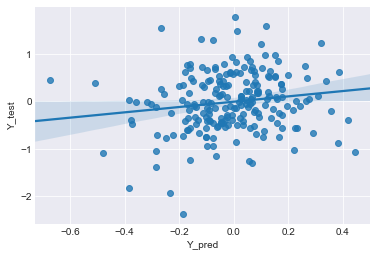

In [48]:
# 2017年のデータで予想し、グラフで予測具合を見る

Y_pred = linear_reg_model.predict(X_test) # 予測する

result = pd.DataFrame(Y_pred) # 予測
result.columns = ['Y_pred']
result['Y_test'] = Y_test

sns.set_style('darkgrid') 
sns.regplot(x='Y_pred', y='Y_test', data=result) #plotする


# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

2017年の利益合計：22.089


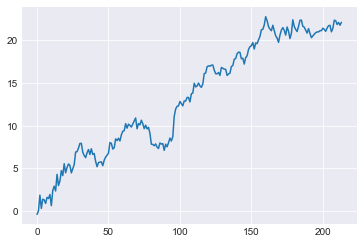

In [52]:
# 2017年の予測結果の合計を計算ーーーーーーーーー
# 前々日終値に比べて前日終値が高い場合は、買いとする
sum_2017 = 0

for i in range(0,len(Y_test)): # len()で要素数を取得しています
    if Y_pred[i] >= 0:
        sum_2017 += Y_test[i]
    else:
        sum_2017 -= Y_test[i]

print("2017年の利益合計：%1.3lf" %sum_2017) 


# 予測結果の総和グラフを描くーーーーーーーーー
total_return = np.zeros(len(Y_test))

if Y_pred[0] >=0: # 2017年の初日を格納
    total_return[0] = Y_test[0]
else:
    total_return[0] = -Y_test[0]

for i in range(1, len(result)): # 2017年の2日以降を格納
    if Y_pred[i] >=0:
        total_return[i] = total_return[i-1] + Y_test[i]
    else:
        total_return[i] = total_return[i-1] - Y_test[i]

plt.plot(total_return)

2017年の利益合計：22.089


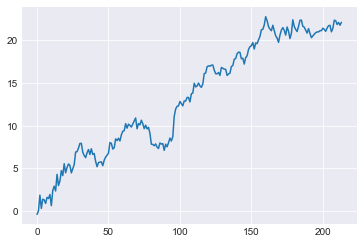

In [53]:
# もしYの規格化を変更している場合などはこちらのセルを使うと正しいです

dif = data2[5194:,4] - data2[5193:-1,4] # 翌日の終値-当日の終値

# 2017年の予測結果の合計を計算ーーーーーーーーー
# 前々日終値に比べて前日終値が高い場合は、買いとする
sum_2017 = 0

for i in range(0,len(dif)): # len()で要素数を取得しています
    if Y_pred[i] >= 0:
        sum_2017 += dif[i]
    else:
        sum_2017 -= dif[i]

print("2017年の利益合計：%1.3lf" %sum_2017) 


# 予測結果の総和グラフを描くーーーーーーーーー
total_return = np.zeros(len(dif))

if Y_pred[0] >=0: # 2017年の初日を格納
    total_return[0] = dif[0]
else:
    total_return[0] = -dif[0]

for i in range(1, len(result)): # 2017年の2日以降を格納
    if Y_pred[i] >=0:
        total_return[i] = total_return[i-1] + dif[i]
    else:
        total_return[i] = total_return[i-1] - dif[i]

plt.plot(total_return)